# Resource

*These trivial matters—diet, locality, climate, and one’s mode of recreation, the whole casuistry of self-love—are inconceivably more important than, all that which has hitherto been held in high esteem!*          
– [Why I am so clever](https://www.gutenberg.org/files/52190/52190-h/52190-h.htm), Ecce Homo

<iframe src="https://www.youtube.com/embed/DBsHdHMvucs?start=120" style="width:100%;height:500px;"></iframe>

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
_Richard Dawkins (Clad in Tie with DNA Helix) vs Ayaan Hirsi Ali (Muslim-Atheist-Christian Transformations)_. This dialogue can only happen between two folks that are not deeply sympathetic with the human condition: they aren't aesthets; they're ideology brandishing ethicists to the core -- all bent on converting the rest of humanity to their views. This is the very inverse of _A Midsummer Nights Dream_ or of _Le Nozze di Figaro_ . 
```

Nietzsche’s proclamation in *Ecce Homo* that seemingly trivial matters—diet, locality, climate, and recreation—are more significant than humanity's revered ideals offers a framework to interrogate the ideological rigidity embodied in the likes of Richard Dawkins and Ayaan Hirsi Ali. Both figures, portrayed as "ethicists to the core," exemplify the antithesis of an aesthetic approach to life, privileging conversion and intellectual dominance over a nuanced understanding of human existence. This intellectualization contrasts sharply with the playful and spontaneous dynamics of works like *A Midsummer Night’s Dream* or *Le Nozze di Figaro*, which celebrate the unpredictability and organic interconnectedness of human relationships. Nietzsche would argue that the ethicists miss the point entirely: life’s essence is found in the everyday, in the tactile and the tangible, not in the abstract battles for ideological supremacy.

To understand this tension, consider the neural network figure’s layered architecture, which metaphorically captures the interplay between deeply ingrained biological inputs and the lofty abstractions of human thought. At its "Pre-Input" layer, nodes such as "Life," "Earth," and "Cosmos" ground the system in fundamental realities. These are akin to Nietzsche’s emphasis on the "casuistry of self-love"—the unpretentious but essential elements of existence. The "Yellowstone" node, labeled "Weltanschauung" (worldview), serves as the bridge between these elemental truths and the human capacity for conceptualization, a point of compression where raw inputs are distilled into coherent frameworks.

However, the subsequent layers—"Cambridge," "LSE," and "Oxford" in the Hidden layer, leading to outputs like "Aristotelian," "Platonic," and "Synthesis"—reveal the dangers of over-intellectualization. Dawkins, with his reductionist lens of biology, and Hirsi Ali, navigating the waters of religious critique and philosophical transformation, operate in this space. Their discourse, while intellectually rich, often bypasses the immediacy of lived experience. This creates a dissonance: their ideological battlegrounds lack the grounding in "diet" or "climate" that Nietzsche champions, rendering their arguments compelling but disconnected from the human condition they aim to address.



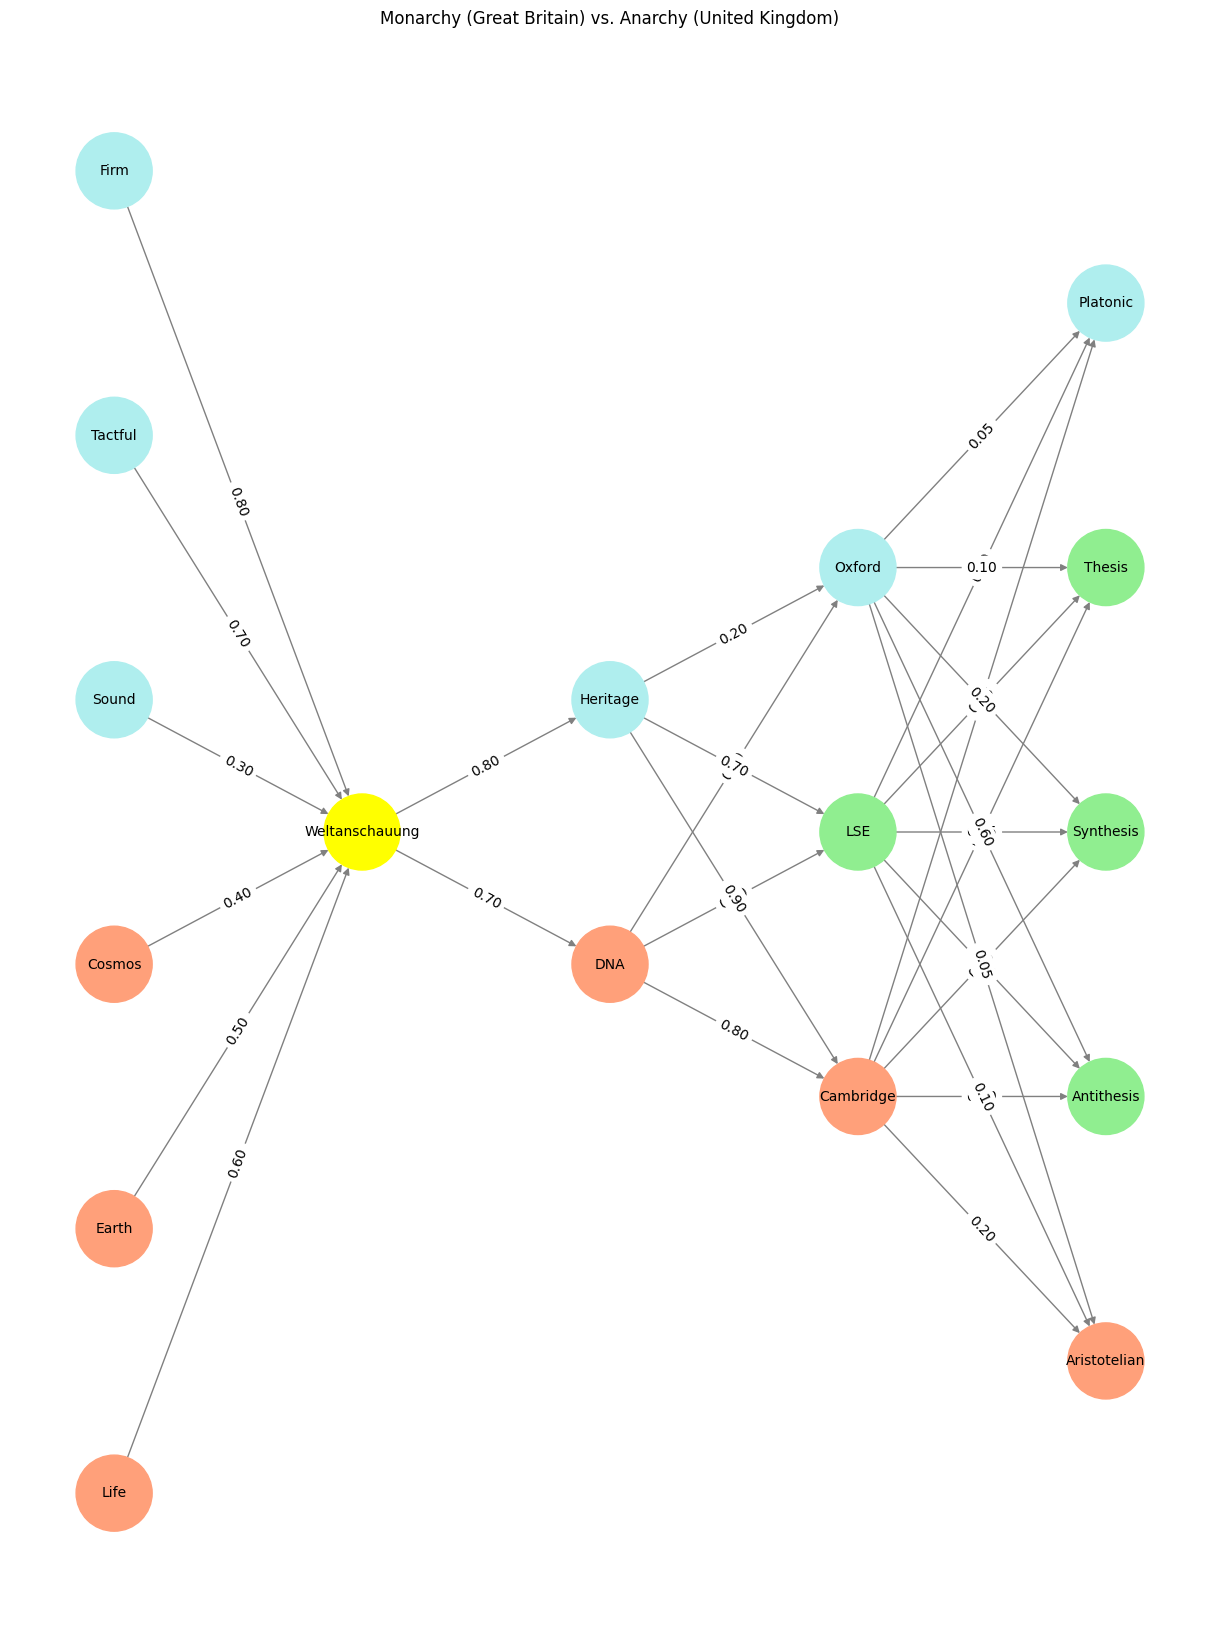

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Weltanschauung'],
        'Input': ['DNA', 'Heritage'],
        'Hidden': [
            'Cambridge',
            'LSE',
            'Oxford',
        ],
        'Output': ['Aristotelian', 'Antithesis', 'Synthesis', 'Thesis', 'Platonic',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Weltanschauung':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Heritage':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Oxford':
            return 'paleturquoise'
        elif node == 'LSE':
            return 'lightgreen'
        elif node == 'Cambridge':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Platonic':
            return 'paleturquoise'
        elif node in ['Synthesis', 'Thesis', 'Antithesis']:
            return 'lightgreen'
        elif node == 'Aristotalian':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Monarchy (Great Britain) vs. Anarchy (United Kingdom)")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
Ultimately, Nietzsche’s critique of Dawkins and Hirsi Ali is not about the validity of their arguments but about their failure to engage with the aesthetic dimensions of life. By reducing existence to ideological or biological terms, they overlook the "diet, locality, and climate" that ground human flourishing. The neural network’s layers remind us that abstraction and intellectualization must remain connected to the tangible and the experiential. Without this connection, humanity risks becoming a caricature of itself: all intellect, no substance, and entirely out of tune with the symphony of life.
```

The stark contrast between this ideological rigidity and the aesthetic spontaneity of Shakespeare and Mozart illuminates Nietzsche’s critique. In *A Midsummer Night’s Dream*, the characters’ lives intertwine in chaotic, unpredictable ways, reflecting the organic complexity of human relationships. Similarly, *Le Nozze di Figaro* revels in the follies and triumphs of its characters, portraying a world where the trivial is elevated to the profound. These works embody a worldview where meaning emerges not through dogmatic assertion but through the playful and unpredictable dance of human interaction. 

The neural network visualization, with its weighted connections and colorful nodes, also offers insights into this dynamic. The "Hidden" layer’s color-coded nodes—paleturquoise, lightgreen, and lightsalmon—represent different philosophical and aesthetic pathways. "Oxford," colored paleturquoise, suggests a detached, analytical approach, whereas "LSE" and "Cambridge," with their lightgreen and lightsalmon hues, indicate more iterative and transformational modes of thought. Nietzsche would likely argue that a harmonious life requires balancing these pathways, not privileging one to the exclusion of others. The aesthetic, embodied by the paleturquoise "Platonic" node in the Output layer, is necessary but must be complemented by the iterative ("Synthesis") and adversarial ("Aristotelian") modes to fully capture the richness of human experience.

